Visualization Ideas
City Ranking and Health Indicators Comparison:

Plot: Scatter plot matrix (splom) to show relationships between different health indicators like Sunshine hours, Obesity levels, Life expectancy, and Pollution index.
Purpose: Allows quick comparison across different cities and hig*hlights potential correlations between these health-related metrics.
City Details and Metrics Overview:

Plot: Parallel Coordinates or Parallel Categories diagram.
Purpose: To display multi-dimensional data in a way that is easy to compare different cities across all metrics simultaneously. It’s beneficial for spotting patterns and outliers.
Happiness and Health Work Balance:

Plot: Bubble chart plotting Happiness levels against Annual avg. hours worked, sized by Obesity levels and colored by Life expectancy.
Purpose: To explore if there’s a correlation between happiness, work balance, obesity, and longevity.
Geographical Distribution:

Plot: Map with metrics such as Pollution and Sunshine hours displayed as colored markers.
Purpose: To geographically understand where cities stand on certain environmental factors, which also impacts health.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthy_lifestyle_city_2021.csv')

# Function to find non-numeric placeholders in each column
def find_placeholders(dataframe):
    for column in dataframe.columns:
        # Attempt to convert the column to numeric, setting errors='coerce'
        # This will replace non-convertible values with NaN
        numeric_series = pd.to_numeric(dataframe[column], errors='coerce')
        
        # Find unique values in the original series that were turned into NaNs
        non_numeric_values = dataframe[column][numeric_series.isna()].unique()
        
        # Print out the non-numeric values found in this column
        if non_numeric_values.size > 0:
            print(f"Non-numeric placeholders in '{column}': {non_numeric_values}")

# Call the function
find_placeholders(df)


Non-numeric placeholders in 'City': ['Amsterdam' 'Sydney' 'Vienna' 'Stockholm' 'Copenhagen' 'Helsinki'
 'Fukuoka' 'Berlin' 'Barcelona' 'Vancouver' 'Melbourne' 'Beijing'
 'Bangkok' 'Buenos Aires' 'Toronto' 'Madrid' 'Jakarta' 'Seoul' 'Frankfurt'
 'Geneva' 'Tel Aviv' 'Istanbul' 'Cairo' 'Taipei' 'Los Angeles' 'Mumbai'
 'Boston' 'Dublin' 'Tokyo' 'Chicago' 'Hong Kong' 'Shanghai' 'Brussels'
 'San Francisco' 'Paris' 'Sao Paulo' 'Zurich' 'London' 'Johannesburg'
 'Milan' 'Washington, D.C.' 'New York' 'Moscow' 'Mexico City']
Non-numeric placeholders in 'Sunshine hours(City)': ['-']
Non-numeric placeholders in 'Cost of a bottle of water(City)': ['£1.92' '£1.48' '£1.94' '£1.72' '£2.19' '£1.60' '£0.78' '£1.55' '£1.19'
 '£1.08' '£1.57' '£0.26' '£0.22' '£0.57' '£1.09' '£1.30' '£0.21' '£0.59'
 '£1.95' '£2.62' '£1.63' '£0.15' '£0.16' '£1.52' '£1.39' '£1.40' '£0.76'
 '£1.20' '£0.75' '£0.29' '£2.11' '£0.44' '£3.20' '£1.16' '£1.15' '£1.45'
 '£1.32' '£0.41' '£0.45']
Non-numeric placeholders in 'Obesity leve

In [6]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('healthy_lifestyle_city_2021.csv')

# Replace "Washington, D.C." with "Washington" in the City column
df['City'] = df['City'].replace('Washington, D.C.', 'Washington')

# Convert columns with pound signs to floats if they are not already converted
columns_to_convert = ['Cost of a bottle of water(City)', 'Cost of a monthly gym membership(City)']
for column in columns_to_convert:
    if df[column].dtype == object:  # Check if the column is still an object type (i.e., string)
        df[column] = df[column].str.replace('£', '').astype(float)

# Convert percentage column to float if not already done
if df['Obesity levels(Country)'].dtype == object:
    df['Obesity levels(Country)'] = df['Obesity levels(Country)'].str.replace('%', '').astype(float)

# Replace '-' with NaN across all columns
df.replace('-', np.nan, inplace=True)

# Save the cleaned data to a new CSV file
df.to_csv('healthy_lifestyle_city_2021_cleaned.csv', index=False)

print("Data cleaning completed and saved to 'healthy_lifestyle_city_2021_cleaned.csv'")



Data cleaning completed and saved to 'healthy_lifestyle_city_2021_cleaned.csv'


In [12]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


In [15]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

# Load the dataset
df = pd.read_csv('healthy_lifestyle_city_2021_cleaned.csv')

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# To prevent hitting the rate limit, we use a rate limiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

# Function to fetch coordinates
def get_lat_lon(city):
    location = geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply the function to each city and create new columns
df['Latitude'], df['Longitude'] = zip(*df['City'].apply(get_lat_lon))

# Save the updated dataset
df.to_csv('healthy_lifestyle_city_2021_with_coords.csv', index=False)

print("Latitude and longitude added to dataset and saved as 'healthy_lifestyle_city_2021_with_coords.csv'.")


Latitude and longitude added to dataset and saved as 'healthy_lifestyle_city_2021_with_coords.csv'.


In [9]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('healthy_lifestyle_city_2021.csv')  # Replace 'your_dataset.csv' with the actual file path
# Ensure all necessary columns are converted to numeric where applicable
columns_to_convert = ['Sunshine hours(City)', 'Pollution(Index score) (City)', 'Annual avg. hours worked']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert and set errors to NaN

# Impute missing values only in numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
df[numeric_df.columns] = numeric_df.fillna(numeric_df.mean())  # Fill NaNs with mean of each column

# Calculate correlation of various metrics with life expectancy, explicitly excluding non-numeric columns
correlations = numeric_df.corr()['Life expectancy(years) (Country)'].sort_values(ascending=False)

# Print the correlations
print(correlations)



Life expectancy(years) (Country)    1.000000
Happiness levels(Country)           0.724587
Number of take out places(City)     0.128163
Outdoor activities(City)           -0.044864
Rank                               -0.320034
Sunshine hours(City)               -0.356351
Annual avg. hours worked           -0.480859
Pollution(Index score) (City)      -0.558713
Name: Life expectancy(years) (Country), dtype: float64


In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with the appropriate columns

# Define the variables for ease of use
variables = [
    'Happiness levels(Country)', 'Number of take out places(City)',
    'Outdoor activities(City)', 'Rank', 'Sunshine hours(City)',
    'Annual avg. hours worked', 'Pollution(Index score) (City)'
]
titles = [
    'Happiness Levels vs Life Expectancy', 'Number of Take Out Places vs Life Expectancy',
    'Outdoor Activities vs Life Expectancy', 'City Rank vs Life Expectancy',
    'Sunshine Hours vs Life Expectancy', 'Annual Avg. Hours Worked vs Life Expectancy',
    'Pollution Index vs Life Expectancy'
]

# Create subplots
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=titles,
    vertical_spacing=0.1
)

# Add scatter plots
row = 1
col = 1
for i, var in enumerate(variables):
    fig.add_trace(
        go.Scatter(
            x=df[var],
            y=df['Life expectancy(years) (Country)'],
            mode='markers',
            marker=dict(size=8, color=np.random.randn(500), colorscale='Viridis', showscale=True),
            name=var
        ),
        row=row,
        col=col
    )
    if col == 2:
        col = 1
        row += 1
    else:
        col += 1

# Update layout
fig.update_layout(
    height=1200,
    width=800,
    title_text="Correlation of Various Metrics with Life Expectancy",
    showlegend=False
)

# Show plot
fig.show()


c:\Users\agobr\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



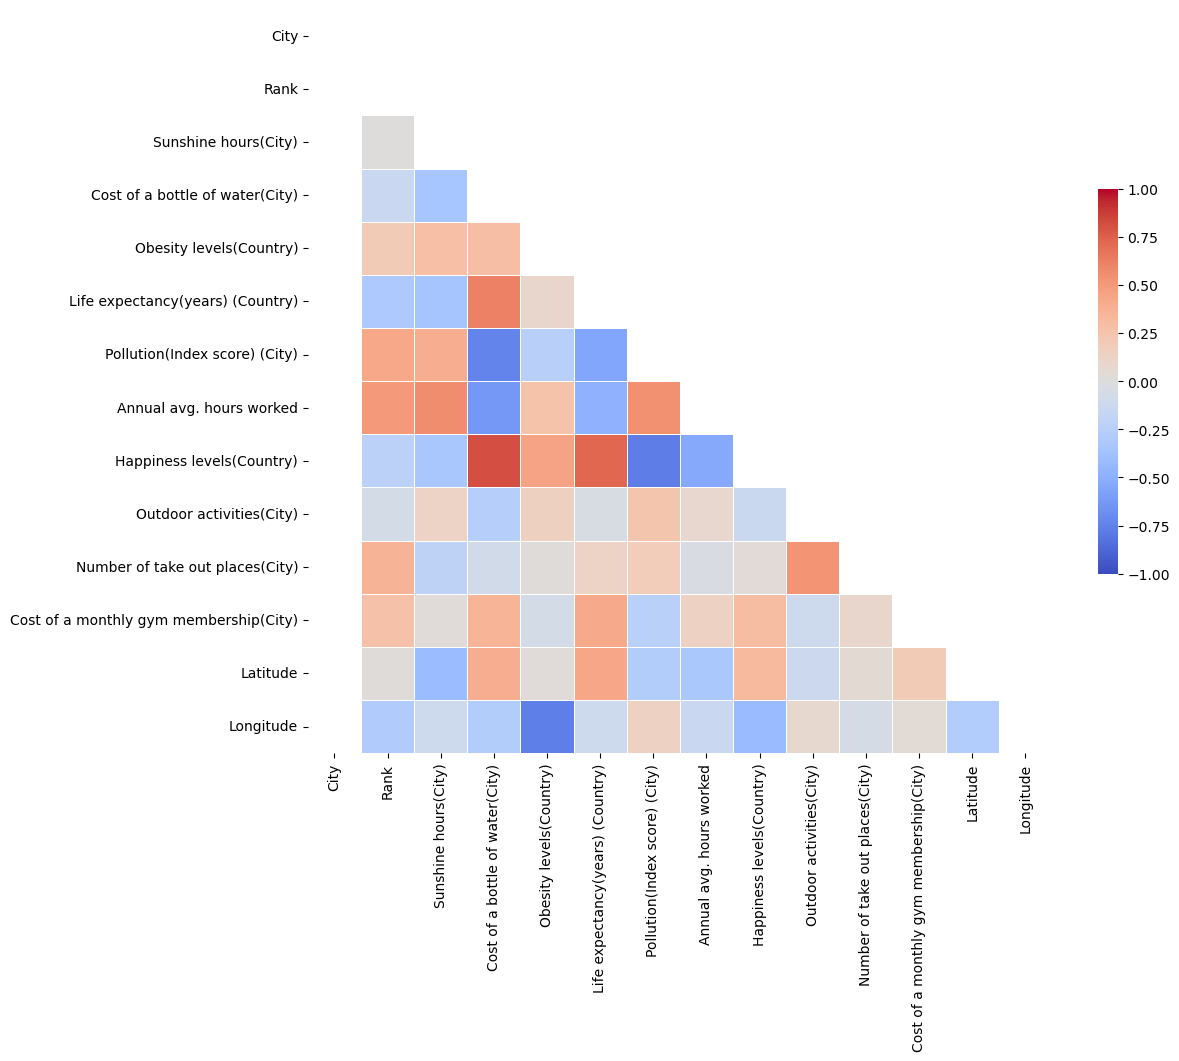

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Convert columns to numeric, errors='coerce' will replace non-convertibles with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# You can choose to drop columns with too many NaN values if necessary
# df_numeric.dropna(axis=1, how='all', inplace=True)

# Calculate the correlation matrix for numeric columns only
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()  # This line will display the plot if you are running this in a script or interactive session
